# Chapter 2 TRANSMISSION LINE THEORY

In [1]:
%matplotlib inline

In [2]:
import pylab as plb
import numpy as npy
from matplotlib.patches import Circle

def smith(smithR=1, chart_type = 'z',ax=None):
    if ax == None:
        ax1 = plb.gca()
    else:
        ax1 = ax

    contour = []
    rHeavyList = [0,1]
    xHeavyList = [1,-1]

    rLightList = plb.logspace(3,-5,30,base=.5)
    xLightList = plb.hstack([plb.logspace(2,-5,15,base=.5), -1*plb.logspace(2,-5,15,base=.5)]) 
    if smithR > 1:
        rMax = (1.+smithR)/(1.-smithR)
        rLightList = plb.hstack([ plb.linspace(0,rMax,11)  , rLightList ])
    if chart_type is 'y':
        y_flip_sign = -1
    else:
        y_flip_sign = 1
    for r in rLightList:
        center = (r/(1.+r)*y_flip_sign,0 ) 
        radius = 1./(1+r)
        contour.append( Circle( center, radius, ec='blue',fc = 'none'))
    for x in xLightList:
        center = (1*y_flip_sign,1./x)
        radius = 1./x
        contour.append( Circle( center, radius, ec='green',fc = 'none'))
    for r in rHeavyList:
        center = (r/(1.+r)*y_flip_sign,0 )
        radius = 1./(1+r)
        contour.append( Circle( center, radius, ec= 'blue', fc = 'none'))
    for x in xHeavyList:
        center = (1*y_flip_sign,1./x)
        radius = 1./x	
        contour.append( Circle( center, radius, ec='green',fc = 'none'))
    ax1.axhline(0, color='red')
    ax1.axvline(1*y_flip_sign, color='red')
    ax1.grid(0)
    ax1.axis('equal')
    ax1.axis(smithR*npy.array([-1., 1., -1., 1.]))
    plb.title('Smith chart')
    plb.xlabel('Tao real')
    plb.ylabel('Tao imaginary')    
    for currentContour in contour:
        ax1.add_patch(currentContour)
        
# function for input impedence .
from sympy import I
def input_impedence(tao,b,l,Zo):
    Zin=Zo*((1+(tao*exp(-2*I*b*l)))/(1-(tao*exp(-2*I*b*l))))
    return Zin;

#”Tao Real”,”Tao Imaginary””Tao Real”,”Tao Imaginary” 
# function for reflection coefficient .
def reflection_coefficient(Zl,Zo): 
    tao=(Zl-Zo)/(Zl+Zo);
    return tao;

def VSWR(tao):
    SWR=(1+tao)/(1-tao)
    return SWR;

## Example:2.1 page.no:61

In [3]:
#example:3.1,page no.72.
# program to determine transmission line parameters

from sympy import symbols,I,conjugate,log,exp,integrate,pi

E,H,Vo,P,a,b,Io,mue,y,z,Q,p,i,L,eipsila,G,C,R,Rs,w=symbols('E,H,Vo,P,a,b,Io,mue,y,z,Q,p,i,L,eipsila,G,C,R,Rs,w');
E=(Vo/(P*log(b/a)))*exp(-I*y*z); # in radial direction .
H=(Io/(2*pi*P))*exp(-I*y*z); # in phi direction .
H=H*conjugate(H)*P;
Io=2*pi
E=E*conjugate(E)*P;
Vo=log(b)-log(a)
E=1/P**2
L=(mue/((Io)**2))*integrate(integrate((1/P),(P,a,b)),(Q,pi,2*pi));# surface integral in culindrical coordinate system
C=(eipsila/(Vo**2))*integrate(integrate(E*P,(P,a,b)),(Q,0,2*pi)); # surface integral in culindrical coordinate systemR=
R=(Rs/(Io**2))*(integrate((1/a),(Q,0,2*pi))+integrate((1/b),(Q,0,2*pi)))
G=((w*eipsila)/(Vo**2))*integrate(integrate(1/P,(P,a,b)),(Q,0,2*pi)); # surface integral in culindrical coordinate system
# result
print "self inductance in H/m =",L
print "capacitance in F/m =",C
print "resistance in Ohm/m =",R
print "shunt conductance in S/m =",G

self inductance in H/m = mue*(-log(a) + log(b))/(4*pi)
capacitance in F/m = 2*pi*eipsila/(-log(a) + log(b))
resistance in Ohm/m = Rs*(2*pi/b + 2*pi/a)/(4*pi**2)
shunt conductance in S/m = 2*pi*eipsila*w/(-log(a) + log(b))


## example:2.3 page no:77

reflection coefficient =  0.367607311047
standing wave ratio =  2.1625919068
return loss in dB =  8.69231719731


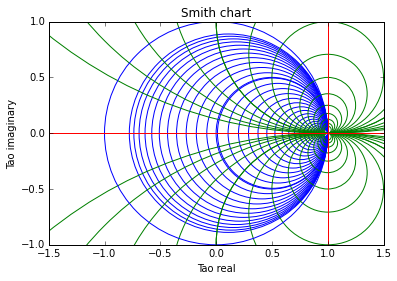

In [4]:
# program to find out return loss in dB,SWR and reflection coefficient .
from math import log10

Zl=80-40j; # load impedence .
Zo=50; # characteristic impedence .
z=Zl/Zo; # normalized impedence .
tao=reflection_coefficient(Zl,Zo);
SWR=VSWR(abs(tao));
Rl=-20*log10(abs(tao));
print "reflection coefficient = ",abs(tao)
print "standing wave ratio = ",SWR
print "return loss in dB = ",Rl
smith();
# when analyse with the help of smith chart . see the angle from x=0 axis i.e Tao real axis.if it is above this axis take angle anticlockwise and if it is below this axis . take angle clockwise from Tao ￼ real axis below .

## example:2.4 page no:80

load impedence =  50*(1 + 0.2*exp(2.48*I*pi))/(1 - 0.2*exp(2.48*I*pi))


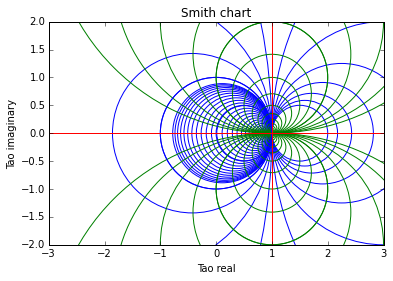

In [5]:
# NOTE:-this example is a method for calculating unknown load impedence of slotted line section. all data are given and preassumed.
# program to determine unknown load impedence.
from sympy import I,oo

Zl=0;Zo=50; # for short circuitting the load.
SWR=oo
# short circuit is removed and replace with unknown load .
SWR =1.5; lamda =0.04;
lmin =4.2 -2.72;
tao=(1.5-1)/(1.5+1);
theta=(pi+((4*pi)/4)*1.48);
tao=abs(tao)*exp(I*theta);
Zl=50*((1+tao)/(1-tao));
# result
print "load impedence = ",Zl
smith(2,y)
# when analyse with the help of smith chart . see angle from x=0 axis i.e Tao real axis.if it is above this axis take angle anticlockwise and if it is below this axis . take angle clockwise from Tao ￼ real axis below .

## example:2.5 page no:84

characteristic impedence of the matching section=  70.7106781187


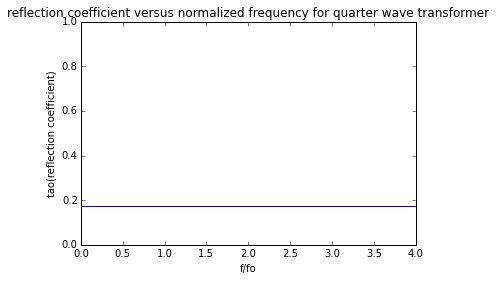

In [11]:
# program to find out characteristic impedence and plot the magnitude of reflection coefficient versus normalized frequency .
from sympy import symbols,I
from pylab import arange,plot,title,xlabel,ylabel,axis
from math import pi
from numpy import sin,cos,sqrt,real,imag

Zl=100;# load impedence
Zi=50;#impedence of line which is to be matched
#as it is a quarter wave transformer so , Zi=(Zo)ˆ2/zl;
Zo=sqrt(Zi*Zl);
print "characteristic impedence of the matching section= ",Zo
f,fo,x=symbols('f,fo,x');
x=f/fo;
x=arange(0,4,0.001)
y=(pi/2)*(x);
Zin=Zo*(((Zl*cos(y))+(Zo*I*sin(y)))/((Zo*cos(y))+(Zl*I*sin(y))))
tao=((Zin-Zo)/(Zin+Zo));
tao=abs(tao)
plot(x,tao)
axis([0,4,0,1])
title ("reflection coefficient versus normalized frequency for quarter wave transformer")
xlabel("f/fo")
ylabel("tao(reflection coefficient)")

## example:2.6 page no:92

In [7]:
# program to calculate attenuation constant.
from sympy import symbols,sqrt,log

alpha,R,Rs,L,G,C,eta,a,b,w,pi,eipsila,eipsilac,mue,eta=symbols('alpha,R,Rs,L,G,C,eta,a,b,w,pi,eipsila,eipsilac,mue,eta')
eta=sqrt(mue/eipsila);
L=(mue/(2*pi))*(log(b/a));
C=(2*pi*eipsila)/log(b/a);
R=(Rs/(2*pi))*((1/a)+(1/b));
G=(2*pi*w*eipsilac)/log(b/a);
alpha=(R*sqrt(C/L)+G*sqrt(L/C))/2;
print "attenuation constant = ",alpha

attenuation constant =  Rs*sqrt(eipsila*pi**2/(mue*log(b/a)**2))*(1/b + 1/a)/(2*pi) + eipsilac*pi*w*sqrt(mue*log(b/a)**2/(eipsila*pi**2))/(2*log(b/a))


## example:2.7 page no:95

In [8]:
# program to find ht eattenuation constant of coaxial line .
from sympy import symbols,log,I,integrate,conjugate

E,H,Vo,Zo,P,a,b,B,z,pi,Po,Q,Rs,Plc,alpha,Pld,w,eipsila=symbols('E,H,Vo,Zo,P,a,b,B,z,pi,Po,Q,Rs,Plc,alpha,Pld,w,eipsila')
#Zo=(eta/(2⇤pi))⇤log(b/a);
E=(Vo/(P*(log(b)-log(a))))*exp(-I*B*z);
H=(Vo/(2*pi*P*Zo))*exp(-I*B*z);
H=conjugate(H)*P; # for defining E cross H⇤.
Po=(1/2)*integrate(integrate((E*H),(P,0,2*pi)),(Q,a,b));
Po=Vo**2/(2*Zo)
print "power flowing on the lossless line = ",Po,"\n"
H=(H*conjugate(H))/P; # for defining |H|ˆ2(;)
Plc=(Rs/2)*integrate(integrate(H,(z,0,1)),(Q,0,2*pi));
print "conductor loss = ",Plc,"\n"
E=E*conjugate(E)*P;
Pld=((w*eipsila)/2)*integrate(integrate(integrate(E,(P,a,b)),(Q,0,2*pi)),(z,0,1));
print "dielectric loss = ",Pld,"\n"
alpha=(Pld+Plc)/(2*Po); # attenuation
#B=beta . constant .
print "attenuation constant = ",alpha,"\n"

power flowing on the lossless line =  Vo**2/(2*Zo) 

conductor loss =  Rs*Vo*conjugate(Vo)*Integral(exp(-I*B*z)*exp(I*conjugate(B)*conjugate(z)), (z, 0, 1))/(4*P*Zo*conjugate(Zo)*conjugate(pi)) 

dielectric loss =  Vo*eipsila*pi*w*conjugate(Vo)*Integral(exp(-I*B*z)*exp(I*conjugate(B)*conjugate(z)), (z, 0, 1))*Integral(1/conjugate(P), (P, a, b))/((log(a) - log(b))*(conjugate(log(a)) - conjugate(log(b)))) 

attenuation constant =  Zo*(Vo*eipsila*pi*w*conjugate(Vo)*Integral(exp(-I*B*z)*exp(I*conjugate(B)*conjugate(z)), (z, 0, 1))*Integral(1/conjugate(P), (P, a, b))/((log(a) - log(b))*(conjugate(log(a)) - conjugate(log(b)))) + Rs*Vo*conjugate(Vo)*Integral(exp(-I*B*z)*exp(I*conjugate(B)*conjugate(z)), (z, 0, 1))/(4*P*Zo*conjugate(Zo)*conjugate(pi)))/Vo**2 



## example:2.8 page no:97

In [9]:
# program to calculate attenuaton due to conductor loss of a coaxial line using incremental inductance rule .
from sympy import symbols,sqrt,log,diff,atan

Zo,eta,pi,a,b,Rs,l,alpha,alpha_c,alpha_dash,delta,alpha_c_dash,sigma,w,mue=symbols('Zo,eta,pi,a,b,Rs,l,alpha,alpha_c,alpha_dash,delta,alpha_c_dash,sigma,w,mue')
sd=sqrt(2/(w*mue*sigma))
Zo=(eta*log(b/a))/(2*pi);
alpha_c=(Rs/(4*Zo*pi**2))*(diff(log(b/a),b)-diff(log(b/a),a));
print "attenuation due to conductor loss = ",alpha_c,"\n"
alpha_c_dash=alpha_c*(1+((2/pi)*atan((1.4*delta)/sd)));
print "attenuation corrected for surface roughness = ",alpha_c_dash

attenuation due to conductor loss =  Rs*(1/b + 1/a)/(2*eta*pi*log(b/a)) 

attenuation corrected for surface roughness =  Rs*(1 + 2*atan(0.7*sqrt(2)*delta/sqrt(1/(mue*sigma*w)))/pi)*(1/b + 1/a)/(2*eta*pi*log(b/a))
